In [2]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder


In [4]:
# Uploading the drug review training dataset

from google.colab import files

uploaded_train = files.upload()


Saving drugsComTrain_raw.tsv to drugsComTrain_raw (5).tsv


In [5]:
# Uploading the drug review testing dataset

uploaded_test = files.upload()

Saving drugsComTest_raw.tsv to drugsComTest_raw (1).tsv


In [6]:
# Iterating through the above uploaded files to convert them into .csv format

with open("train_data.tsv", "wb") as f:
    f.write(uploaded_train[next(iter(uploaded_train))])

with open("test_data.tsv", "wb") as f:
    f.write(uploaded_test[next(iter(uploaded_test))])


In [7]:
# Loading the dataset into a dataframe

train_data = pd.read_csv("train_data.tsv", delimiter='\t')
test_data = pd.read_csv("test_data.tsv", delimiter='\t')


In [8]:
# Saving the files in .csv format

train_data.to_csv("train_data.csv", index=False)
test_data.to_csv("test_data.csv", index=False)


In [9]:
# First few rows of loaded datasets

print("Train Data Head:\n", train_data.head())


Train Data Head:
    Unnamed: 0                  drugName                     condition  \
0      206461                 Valsartan  Left Ventricular Dysfunction   
1       95260                Guanfacine                          ADHD   
2       92703                    Lybrel                 Birth Control   
3      138000                Ortho Evra                 Birth Control   
4       35696  Buprenorphine / naloxone             Opiate Dependence   

                                              review  rating  \
0  "It has no side effect, I take it in combinati...     9.0   
1  "My son is halfway through his fourth week of ...     8.0   
2  "I used to take another oral contraceptive, wh...     5.0   
3  "This is my first time using any form of birth...     8.0   
4  "Suboxone has completely turned my life around...     9.0   

                date  usefulCount  
0       May 20, 2012           27  
1     April 27, 2010          192  
2  December 14, 2009           17  
3   November 3

In [10]:
print("Test Data Head:\n", test_data.head())

Test Data Head:
    Unnamed: 0         drugName                     condition  \
0      163740      Mirtazapine                    Depression   
1      206473       Mesalamine  Crohn's Disease, Maintenance   
2      159672          Bactrim       Urinary Tract Infection   
3       39293         Contrave                   Weight Loss   
4       97768  Cyclafem 1 / 35                 Birth Control   

                                              review  rating  \
0  "I&#039;ve tried a few antidepressants over th...    10.0   
1  "My son has Crohn&#039;s disease and has done ...     8.0   
2                      "Quick reduction of symptoms"     9.0   
3  "Contrave combines drugs that were used for al...     9.0   
4  "I have been on this birth control for one cyc...     9.0   

                 date  usefulCount  
0   February 28, 2012           22  
1        May 17, 2009           17  
2  September 29, 2017            3  
3       March 5, 2017           35  
4    October 22, 2015       

In [11]:
# Shape of the datasets
print(train_data.shape)
print(test_data.shape)


(161297, 7)
(53766, 7)


In [12]:
# Describing the dataset

print("Description of train dataset:\n", train_data.describe())

Description of train dataset:
           Unnamed: 0         rating    usefulCount
count  161297.000000  161297.000000  161297.000000
mean   115923.585305       6.994377      28.004755
std     67004.445170       3.272329      36.403742
min         2.000000       1.000000       0.000000
25%     58063.000000       5.000000       6.000000
50%    115744.000000       8.000000      16.000000
75%    173776.000000      10.000000      36.000000
max    232291.000000      10.000000    1291.000000


In [13]:
print("Description of testing dataset:\n", test_data.describe())

Description of testing dataset:
           Unnamed: 0        rating   usefulCount
count   53766.000000  53766.000000  53766.000000
mean   116386.701187      6.976900     27.989752
std     67017.739881      3.285207     36.172833
min         0.000000      1.000000      0.000000
25%     58272.500000      4.000000      6.000000
50%    116248.500000      8.000000     16.000000
75%    174586.750000     10.000000     36.000000
max    232284.000000     10.000000    949.000000


In [14]:
# Information on the dataset

print(train_data.info())
print("\n",test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   161297 non-null  int64  
 1   drugName     161297 non-null  object 
 2   condition    160398 non-null  object 
 3   review       161297 non-null  object 
 4   rating       161297 non-null  float64
 5   date         161297 non-null  object 
 6   usefulCount  161297 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 8.6+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53766 entries, 0 to 53765
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   53766 non-null  int64  
 1   drugName     53766 non-null  object 
 2   condition    53471 non-null  object 
 3   review       53766 non-null  object 
 4   rating       53766 non-null  float64
 5   date         53766 non-null  

In [15]:
# Data Preprocessing
# Examining "Unnamed: 0"

print(train_data['Unnamed: 0'].unique())
print(test_data['Unnamed: 0'].unique())


[206461  95260  92703 ... 187382  47128 215220]
[163740 206473 159672 ... 130945  47656 113712]


In [16]:
print(train_data['Unnamed: 0'].value_counts())
print(test_data['Unnamed: 0'].value_counts())

Unnamed: 0
206461    1
115685    1
78842     1
151214    1
225627    1
         ..
140483    1
29358     1
65306     1
26066     1
215220    1
Name: count, Length: 161297, dtype: int64
Unnamed: 0
163740    1
99146     1
195954    1
121131    1
88774     1
         ..
139402    1
167880    1
83507     1
37059     1
113712    1
Name: count, Length: 53766, dtype: int64


In [17]:
# Each column has a unique identifer represented with random integer values in column "Unnamed: 0"
# Dropping column as a part of pre-processing

train_data.drop(columns=['Unnamed: 0'], inplace=True)
test_data.drop(columns=['Unnamed: 0'], inplace=True)

In [18]:
print(train_data)

                        drugName                     condition  \
0                      Valsartan  Left Ventricular Dysfunction   
1                     Guanfacine                          ADHD   
2                         Lybrel                 Birth Control   
3                     Ortho Evra                 Birth Control   
4       Buprenorphine / naloxone             Opiate Dependence   
...                          ...                           ...   
161292                   Campral            Alcohol Dependence   
161293            Metoclopramide               Nausea/Vomiting   
161294                   Orencia          Rheumatoid Arthritis   
161295        Thyroid desiccated           Underactive Thyroid   
161296              Lubiprostone         Constipation, Chronic   

                                                   review  rating  \
0       "It has no side effect, I take it in combinati...     9.0   
1       "My son is halfway through his fourth week of ...     8.0   


In [19]:
print(test_data)

              drugName                     condition  \
0          Mirtazapine                    Depression   
1           Mesalamine  Crohn's Disease, Maintenance   
2              Bactrim       Urinary Tract Infection   
3             Contrave                   Weight Loss   
4      Cyclafem 1 / 35                 Birth Control   
...                ...                           ...   
53761        Tamoxifen     Breast Cancer, Prevention   
53762     Escitalopram                       Anxiety   
53763   Levonorgestrel                 Birth Control   
53764       Tapentadol                          Pain   
53765        Arthrotec                      Sciatica   

                                                  review  rating  \
0      "I&#039;ve tried a few antidepressants over th...    10.0   
1      "My son has Crohn&#039;s disease and has done ...     8.0   
2                          "Quick reduction of symptoms"     9.0   
3      "Contrave combines drugs that were used for al..

In [20]:
# Frequency of drugs in "drugName"

print(train_data['drugName'].value_counts())

drugName
Levonorgestrel                       3657
Etonogestrel                         3336
Ethinyl estradiol / norethindrone    2850
Nexplanon                            2156
Ethinyl estradiol / norgestimate     2117
                                     ... 
Omnipaque 350                           1
Vontrol                                 1
Ivabradine                              1
Neo-Poly-Dex                            1
Grifulvin V                             1
Name: count, Length: 3436, dtype: int64


In [21]:
# Checking for missing values in the dataset

missing_values_train = train_data.isnull().sum()
print("Missing Values in Train Data:")
print(missing_values_train)

missing_values_test = test_data.isnull().sum()
print("\nMissing Values in Test Data:")
print(missing_values_test)


Missing Values in Train Data:
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64

Missing Values in Test Data:
drugName         0
condition      295
review           0
rating           0
date             0
usefulCount      0
dtype: int64


In [22]:
# As only missing values is in "condition" we check for the percentage of missing values

missing_percentage_train = (missing_values_train / len(train_data)) * 100
print("Percentage of Missing Values in Train Data:")
print(missing_percentage_train)

missing_percentage_test = (missing_values_test / len(test_data)) * 100
print("\nPercentage of Missing Values in Test Data:")
print(missing_percentage_test)

Percentage of Missing Values in Train Data:
drugName       0.000000
condition      0.557357
review         0.000000
rating         0.000000
date           0.000000
usefulCount    0.000000
dtype: float64

Percentage of Missing Values in Test Data:
drugName       0.000000
condition      0.548674
review         0.000000
rating         0.000000
date           0.000000
usefulCount    0.000000
dtype: float64


In [23]:
# We drop rows with missing values

train_data.dropna(inplace=True)
test_data.dropna(inplace=True)

In [24]:
print("Missing Values in Train Data:")
print(train_data.isnull().sum())

print("\nMissing Values in Test Data:")
print(test_data.isnull().sum())

Missing Values in Train Data:
drugName       0
condition      0
review         0
rating         0
date           0
usefulCount    0
dtype: int64

Missing Values in Test Data:
drugName       0
condition      0
review         0
rating         0
date           0
usefulCount    0
dtype: int64


In [25]:
# Normalizing rating and usefulCount columns

# Training Dataset
train_data['rating'] = (train_data['rating'] - train_data['rating'].min()) / (train_data['rating'].max() - train_data['rating'].min())
train_data['usefulCount'] = (train_data['usefulCount'] - train_data['usefulCount'].min()) / (train_data['usefulCount'].max() - train_data['usefulCount'].min())

# Testing Dataset
test_data['rating'] = (test_data['rating'] - test_data['rating'].min()) / (test_data['rating'].max() - test_data['rating'].min())
test_data['usefulCount'] = (test_data['usefulCount'] - test_data['usefulCount'].min()) / (test_data['usefulCount'].max() - test_data['usefulCount'].min())


In [26]:
# Print the first few rows to verify the normalization

print(train_data[['rating', 'usefulCount']].head())
print(test_data[['rating', 'usefulCount' ]].head())

     rating  usefulCount
0  0.888889     0.020914
1  0.777778     0.148722
2  0.444444     0.013168
3  0.777778     0.007746
4  0.888889     0.028660
     rating  usefulCount
0  1.000000     0.023182
1  0.777778     0.017914
2  0.888889     0.003161
3  0.888889     0.036881
4  0.888889     0.004215


In [27]:
# Pre-processing date column in train and test datasets

train_data['date'] = pd.to_datetime(train_data['date'])
test_data['date'] = pd.to_datetime(test_data['date'])

In [28]:
train_data.head()

,drugName,condition,review,rating,date,usefulCount
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",0.888889,2012-05-20,0.020914
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",0.777778,2010-04-27,0.148722
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",0.444444,2009-12-14,0.013168
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",0.777778,2015-11-03,0.007746
4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",0.888889,2016-11-27,0.028660


In [29]:
test_data.head()

,drugName,condition,review,rating,date,usefulCount
0,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",1.000000,2012-02-28,0.023182
1,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",0.777778,2009-05-17,0.017914
2,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",0.888889,2017-09-29,0.003161
3,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",0.888889,2017-03-05,0.036881
4,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",0.888889,2015-10-22,0.004215


In [30]:
# Pre-processing review column
# Converting text to lowercase notation

train_data['review'] = train_data['review'].str.lower()
test_data['review'] = test_data['review'].str.lower()

In [31]:
# Printing the first few words

print(train_data['review'].head())
print(test_data['review'].head())

0    "it has no side effect, i take it in combinati...
1    "my son is halfway through his fourth week of ...
2    "i used to take another oral contraceptive, wh...
3    "this is my first time using any form of birth...
4    "suboxone has completely turned my life around...
Name: review, dtype: object
0    "i&#039;ve tried a few antidepressants over th...
1    "my son has crohn&#039;s disease and has done ...
2                        "quick reduction of symptoms"
3    "contrave combines drugs that were used for al...
4    "i have been on this birth control for one cyc...
Name: review, dtype: object


In [32]:
# Text tokenization for further processing of review feature
# Defining tokenize_text function

from nltk.tokenize import word_tokenize

def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens


In [33]:
# Downloading NLTK's punkt tokenizer

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [34]:
train_data['review'] = train_data['review'].apply(tokenize_text)
test_data['review'] = test_data['review'].apply(tokenize_text)

In [35]:
# Review tokens

print(train_data['review'].head())
print(test_data['review'].head())

0    [``, it, has, no, side, effect, ,, i, take, it...
1    [``, my, son, is, halfway, through, his, fourt...
2    [``, i, used, to, take, another, oral, contrac...
3    [``, this, is, my, first, time, using, any, fo...
4    [``, suboxone, has, completely, turned, my, li...
Name: review, dtype: object
0    [``, i, &, #, 039, ;, ve, tried, a, few, antid...
1    [``, my, son, has, crohn, &, #, 039, ;, s, dis...
2             [``, quick, reduction, of, symptoms, '']
3    [``, contrave, combines, drugs, that, were, us...
4    [``, i, have, been, on, this, birth, control, ...
Name: review, dtype: object


In [36]:
# Removing punctuations from the above generated tokens
# Defining function remove_punctuation
import string

def remove_punctuation(tokens):
    punctuations = string.punctuation
    tokens_without_punctuations = [token for token in tokens if token not in punctuations]
    return tokens_without_punctuations


In [37]:
# Removing punctuations

train_data['review'] = train_data['review'].apply(remove_punctuation)
test_data['review'] = test_data['review'].apply(remove_punctuation)

In [38]:
# Review Tokens

print(train_data['review'].head())
print(test_data['review'].head())

0    [``, it, has, no, side, effect, i, take, it, i...
1    [``, my, son, is, halfway, through, his, fourt...
2    [``, i, used, to, take, another, oral, contrac...
3    [``, this, is, my, first, time, using, any, fo...
4    [``, suboxone, has, completely, turned, my, li...
Name: review, dtype: object
0    [``, i, 039, ve, tried, a, few, antidepressant...
1    [``, my, son, has, crohn, 039, s, disease, and...
2             [``, quick, reduction, of, symptoms, '']
3    [``, contrave, combines, drugs, that, were, us...
4    [``, i, have, been, on, this, birth, control, ...
Name: review, dtype: object


In [39]:
# Removing stopwords

from nltk.corpus import stopwords

# Download stopwords
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [40]:
# Getting stopwords from English

stop_words = set(stopwords.words('english'))

In [41]:
# Defining function remove_stopwords

def remove_stopwords(tokens):
    tokens_without_stopwords = [token for token in tokens if token not in stop_words]
    return tokens_without_stopwords

In [42]:
# Remove stopwords

train_data['review'] = train_data['review'].apply(remove_stopwords)
test_data['review'] = test_data['review'].apply(remove_stopwords)

In [43]:
# Review modifications

print(train_data['review'].head())
print(test_data['review'].head())

0    [``, side, effect, take, combination, bystolic...
1    [``, son, halfway, fourth, week, intuniv, beca...
2    [``, used, take, another, oral, contraceptive,...
3    [``, first, time, using, form, birth, control,...
4    [``, suboxone, completely, turned, life, aroun...
Name: review, dtype: object
0    [``, 039, tried, antidepressants, years, cital...
1    [``, son, crohn, 039, disease, done, well, asa...
2                 [``, quick, reduction, symptoms, '']
3    [``, contrave, combines, drugs, used, alcohol,...
4    [``, birth, control, one, cycle, reading, revi...
Name: review, dtype: object


In [44]:
# Lemmatization
# This helps in normalizing the text data and reducing the dimensionality of the feature space

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens


In [45]:
# Download wordnet

import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [46]:
# Applying lemmatization to the tokens

train_data['review'] = train_data['review'].apply(lemmatize_tokens)
test_data['review'] = test_data['review'].apply(lemmatize_tokens)

In [47]:
# Review changes

print(train_data['review'].head())
print(test_data['review'].head())

0    [``, side, effect, take, combination, bystolic...
1    [``, son, halfway, fourth, week, intuniv, beca...
2    [``, used, take, another, oral, contraceptive,...
3    [``, first, time, using, form, birth, control,...
4    [``, suboxone, completely, turned, life, aroun...
Name: review, dtype: object
0    [``, 039, tried, antidepressant, year, citalop...
1    [``, son, crohn, 039, disease, done, well, asa...
2                  [``, quick, reduction, symptom, '']
3    [``, contrave, combine, drug, used, alcohol, s...
4    [``, birth, control, one, cycle, reading, revi...
Name: review, dtype: object


In [48]:
# Stemming

from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

# Defining function for stemming

def stem_tokens(tokens):
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return stemmed_tokens

In [49]:
# Apply stemming
# Stemming is a more aggressive approach where words are reduced to their root form by removing suffixes

train_data['review'] = train_data['review'].apply(stem_tokens)
test_data['review'] = test_data['review'].apply(stem_tokens)

In [50]:
# Review changes

print(train_data['review'].head())
print(test_data['review'].head())

0    [``, side, effect, take, combin, bystol, 5, mg...
1    [``, son, halfway, fourth, week, intuniv, beca...
2    [``, use, take, anoth, oral, contracept, 21, p...
3    [``, first, time, use, form, birth, control, 0...
4    [``, suboxon, complet, turn, life, around, fee...
Name: review, dtype: object
0    [``, 039, tri, antidepress, year, citalopram, ...
1    [``, son, crohn, 039, diseas, done, well, asac...
2                     [``, quick, reduct, symptom, '']
3    [``, contrav, combin, drug, use, alcohol, smok...
4    [``, birth, control, one, cycl, read, review, ...
Name: review, dtype: object


In [51]:
# Removing HTML tags and special characters if any from the tokens

import re

# Function for removing html tokens

def remove_html(text):
    text_without_html = re.sub(r'<.*?>', '', text)
    text_cleaned = re.sub(r'[^a-zA-Z0-9\s]', '', text_without_html)
    return text_cleaned

def remove_html_from_tokens(tokens):
    text = ' '.join(tokens)
    text_cleaned = remove_html(text)
    tokens_cleaned = text_cleaned.split()
    return tokens_cleaned


In [52]:
# Applying the above function

train_data['review'] = train_data['review'].apply(remove_html_from_tokens)
test_data['review'] = test_data['review'].apply(remove_html_from_tokens)

In [53]:
# Review modifications

print(train_data['review'].head())
print(test_data['review'].head())

0    [side, effect, take, combin, bystol, 5, mg, fi...
1    [son, halfway, fourth, week, intuniv, becam, c...
2    [use, take, anoth, oral, contracept, 21, pill,...
3    [first, time, use, form, birth, control, 039, ...
4    [suboxon, complet, turn, life, around, feel, h...
Name: review, dtype: object
0    [039, tri, antidepress, year, citalopram, fluo...
1    [son, crohn, 039, diseas, done, well, asacol, ...
2                             [quick, reduct, symptom]
3    [contrav, combin, drug, use, alcohol, smoke, o...
4    [birth, control, one, cycl, read, review, type...
Name: review, dtype: object


In [54]:
# Understanding frequency of words
# Word frequency analysis

from collections import Counter

# Function for word frequency
def word_frequency(text_data):
    # Flatten the tokens
    flattened_text = [word for sublist in text_data for word in sublist]
    # Counting frequency of each word
    word_freq = Counter(flattened_text)
    return word_freq


In [55]:
# Computing word frequency analysis

train_word_freq = word_frequency(train_data['review'])
test_word_freq = word_frequency(test_data['review'])

In [56]:
# Print the most common words and their frequencies

print("Common words in training data:")
print(train_word_freq.most_common(10))

Common words in training data:
[('039', 260971), ('take', 97823), ('day', 95556), ('month', 68440), ('year', 65495), ('effect', 62818), ('work', 61997), ('get', 57942), ('week', 57611), ('start', 57014)]


In [57]:
print("Common words in testing data:")
print(test_word_freq.most_common(10))

Common words in testing data:
[('039', 87668), ('take', 32271), ('day', 32168), ('month', 22720), ('year', 21835), ('effect', 21007), ('work', 20824), ('week', 19474), ('get', 19294), ('start', 19218)]


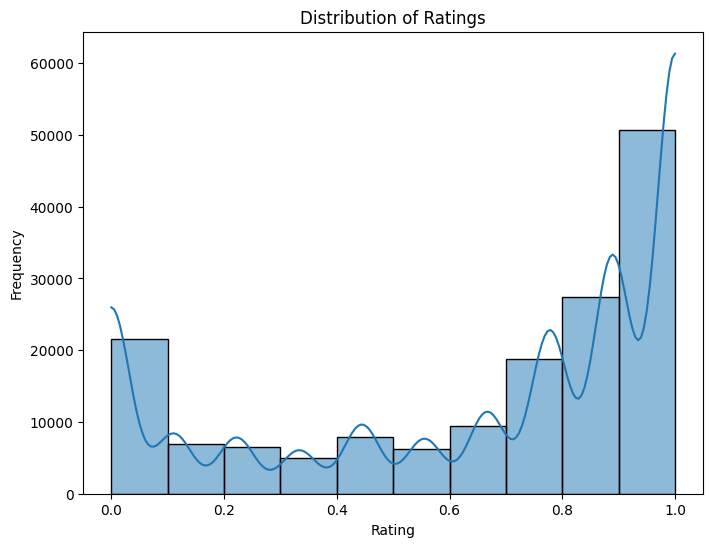

In [58]:
# Data Visualization
from wordcloud import WordCloud

# Distribution of Ratings
plt.figure(figsize=(8, 6))
sns.histplot(data=train_data, x='rating', bins=10, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

<ipython-input-59-d478e0b689fc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_conditions.values, y=top_conditions.index, palette='viridis')


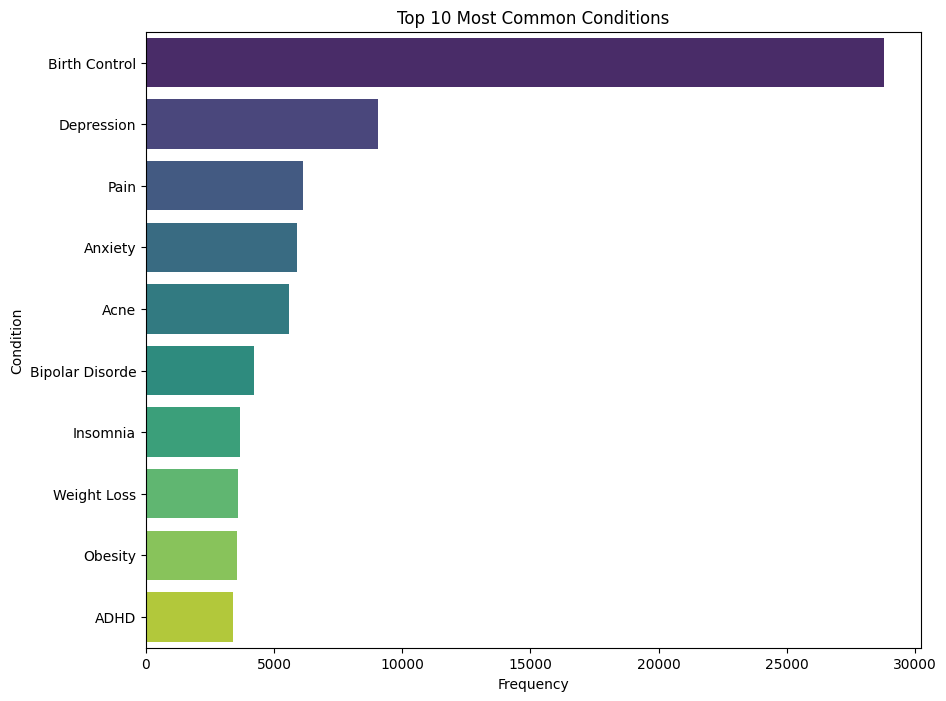

In [59]:
# Most common conditions mentioned in the reviews

plt.figure(figsize=(10, 8))
top_conditions = train_data['condition'].value_counts().head(10)
sns.barplot(x=top_conditions.values, y=top_conditions.index, palette='viridis')
plt.title('Top 10 Most Common Conditions')
plt.xlabel('Frequency')
plt.ylabel('Condition')
plt.show()

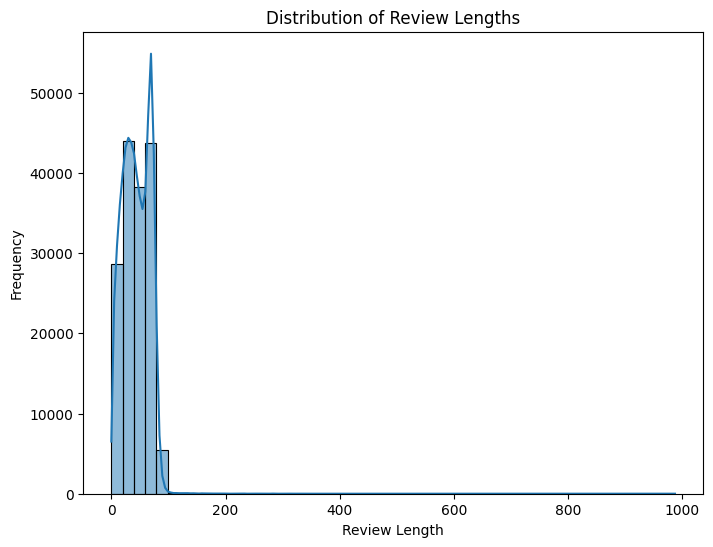

In [60]:
# Length of reviews

train_data['review_length'] = train_data['review'].apply(len)

plt.figure(figsize=(8, 6))
sns.histplot(data=train_data, x='review_length', bins=50, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

<ipython-input-61-383b49afe82d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x='year', palette='mako')


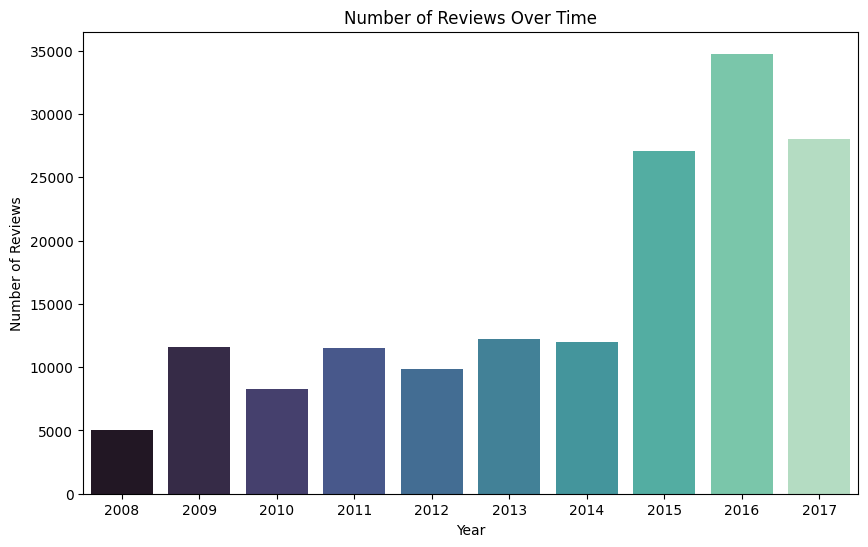

In [61]:
# Temporal Analysis
train_data['date'] = pd.to_datetime(train_data['date'])
train_data['year'] = train_data['date'].dt.year

plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='year', palette='mako')
plt.title('Number of Reviews Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.show()

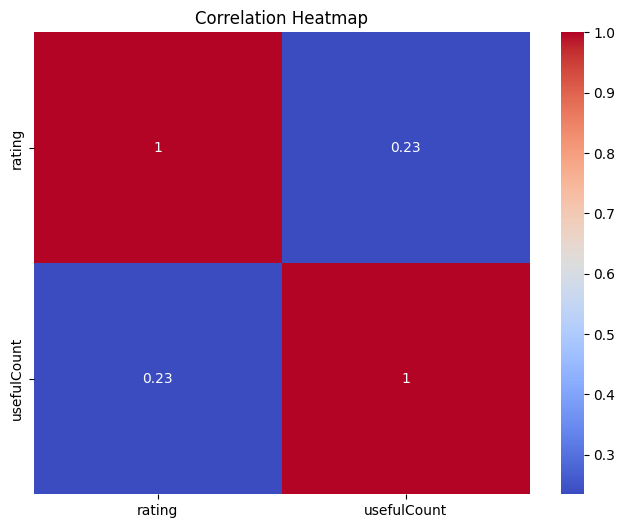

In [62]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(train_data[['rating', 'usefulCount']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [63]:
# Downloading vader_lexicon for using SentimentIntensityAnalyzer

import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [64]:
# Implementing analyze_sentiment function that performs sentiment analysis on each review and
# returns the sentiment category i.e. positive, negative or neutral

from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

def analyze_sentiment(review):
    sentiment_scores = sid.polarity_scores(review)
    if sentiment_scores['compound'] >= 0.05:
        return 'positive'
    elif sentiment_scores['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'


In [65]:
# Apply sentiment analysis and creating a sentiment column

train_data['sentiment'] = train_data['review'].apply(lambda x: analyze_sentiment(' '.join(x)))

In [66]:
# On testing data
test_data['sentiment'] = test_data['review'].apply(lambda x: analyze_sentiment(' '.join(x)))

In [67]:
print(train_data)

                        drugName                     condition  \
0                      Valsartan  Left Ventricular Dysfunction   
1                     Guanfacine                          ADHD   
2                         Lybrel                 Birth Control   
3                     Ortho Evra                 Birth Control   
4       Buprenorphine / naloxone             Opiate Dependence   
...                          ...                           ...   
161292                   Campral            Alcohol Dependence   
161293            Metoclopramide               Nausea/Vomiting   
161294                   Orencia          Rheumatoid Arthritis   
161295        Thyroid desiccated           Underactive Thyroid   
161296              Lubiprostone         Constipation, Chronic   

                                                   review    rating  \
0       [side, effect, take, combin, bystol, 5, mg, fi...  0.888889   
1       [son, halfway, fourth, week, intuniv, becam, c...  0.7777

In [68]:
print(test_data)

              drugName                     condition  \
0          Mirtazapine                    Depression   
1           Mesalamine  Crohn's Disease, Maintenance   
2              Bactrim       Urinary Tract Infection   
3             Contrave                   Weight Loss   
4      Cyclafem 1 / 35                 Birth Control   
...                ...                           ...   
53761        Tamoxifen     Breast Cancer, Prevention   
53762     Escitalopram                       Anxiety   
53763   Levonorgestrel                 Birth Control   
53764       Tapentadol                          Pain   
53765        Arthrotec                      Sciatica   

                                                  review    rating       date  \
0      [039, tri, antidepress, year, citalopram, fluo...  1.000000 2012-02-28   
1      [son, crohn, 039, diseas, done, well, asacol, ...  0.777778 2009-05-17   
2                               [quick, reduct, symptom]  0.888889 2017-09-29   
3  

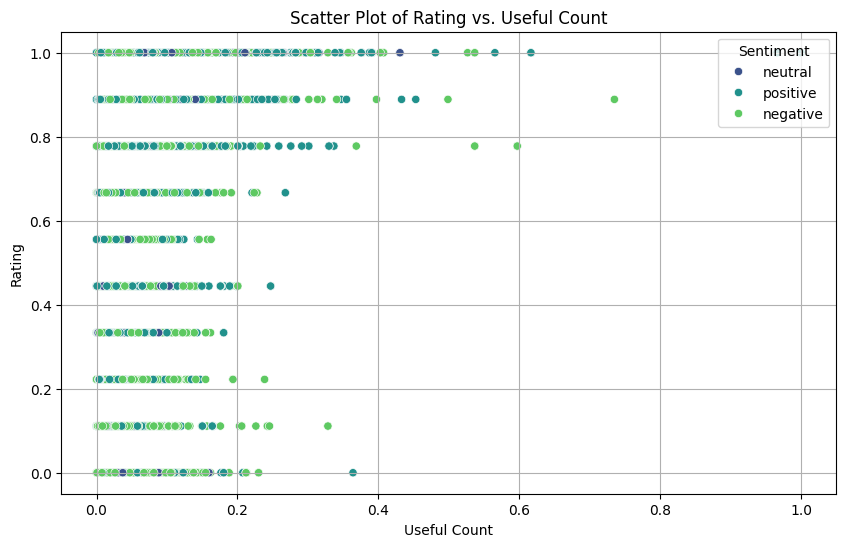

In [69]:
# Scatter Plot

plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_data, x='usefulCount', y='rating', hue='sentiment', palette='viridis')
plt.title('Scatter Plot of Rating vs. Useful Count')
plt.xlabel('Useful Count')
plt.ylabel('Rating')
plt.legend(title='Sentiment', loc='upper right')
plt.grid(True)
plt.show()

<ipython-input-70-2b5d26169010>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_data, x='sentiment', y='rating', palette='viridis')


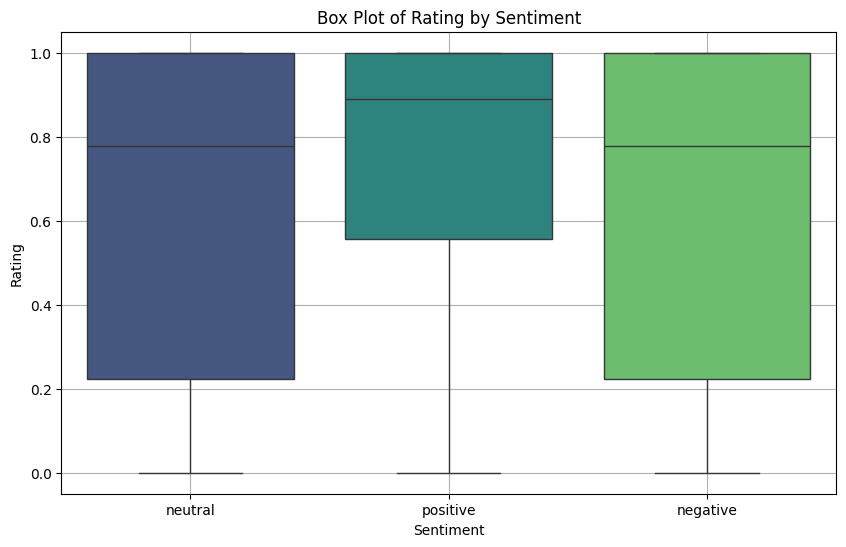

In [70]:
# Box Plot

plt.figure(figsize=(10, 6))
sns.boxplot(data=train_data, x='sentiment', y='rating', palette='viridis')
plt.title('Box Plot of Rating by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Rating')
plt.grid(True)
plt.show()

<ipython-input-71-8fb77f8c35d6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_data, x='sentiment', y='review_length', palette='Set2')


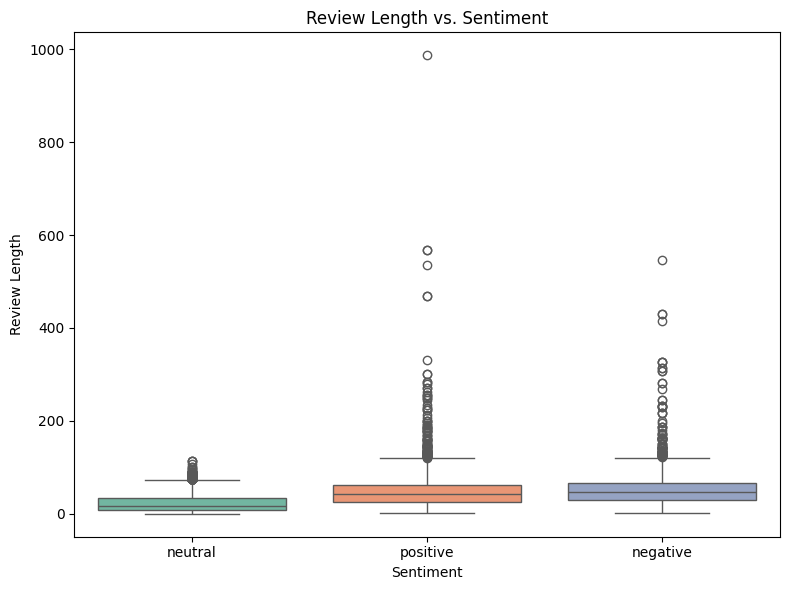

In [71]:
# Review Length vs. Sentiment

plt.figure(figsize=(8, 6))
sns.boxplot(data=train_data, x='sentiment', y='review_length', palette='Set2')
plt.title('Review Length vs. Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Review Length')
plt.tight_layout()
plt.show()

In [72]:
# Word frequency v/s sentiment

positive_reviews = ' '.join([' '.join(review) for review in train_data[train_data['sentiment'] == 'positive']['review']])
negative_reviews = ' '.join([' '.join(review) for review in train_data[train_data['sentiment'] == 'negative']['review']])
neutral_reviews = ' '.join([' '.join(review) for review in train_data[train_data['sentiment'] == 'neutral']['review']])

wc_positive = WordCloud(width=800, height=400).generate(positive_reviews)
wc_negative = WordCloud(width=800, height=400).generate(negative_reviews)
wc_neutral = WordCloud(width=800, height=400).generate(neutral_reviews)


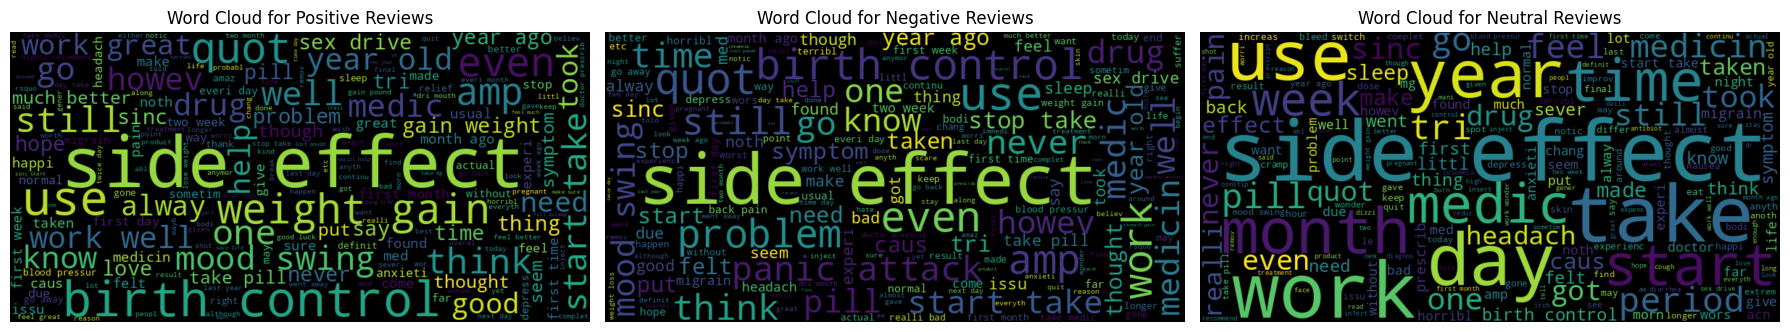

In [73]:
# Word frequency v/s sentiment

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(wc_positive, interpolation='bilinear')
plt.title('Word Cloud for Positive Reviews')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(wc_negative, interpolation='bilinear')
plt.title('Word Cloud for Negative Reviews')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(wc_neutral, interpolation='bilinear')
plt.title('Word Cloud for Neutral Reviews')
plt.axis('off')

plt.tight_layout()
plt.show()

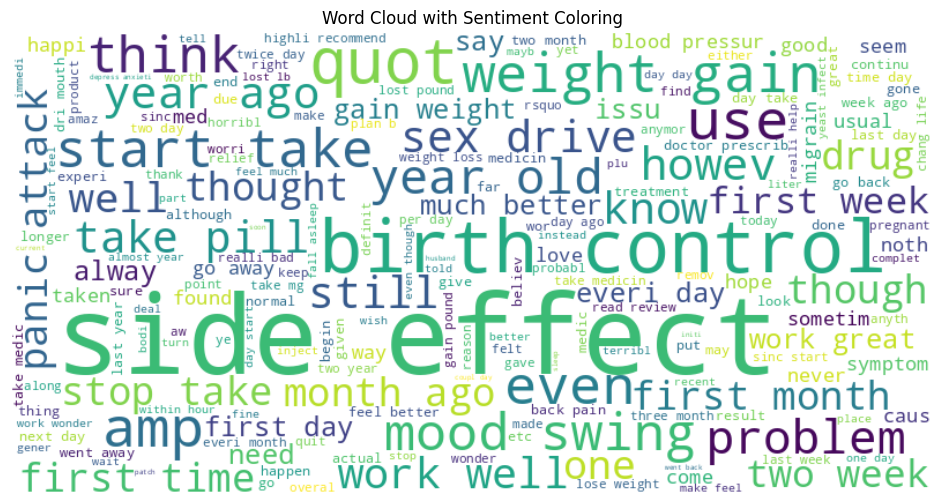

In [74]:
# Word Cloud with Sentiment Coloring
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_reviews = ' '.join(train_data['review'].apply(lambda x: ' '.join(x)))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud with Sentiment Coloring')
plt.axis('off')
plt.show()

In [82]:
# Vectorization
# Process of converting text data into numerical vectors that can be used as input for deep learning models
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorization using TF-IDF method
tfidf_vectorizer = TfidfVectorizer()

# Converting tokens into a string for reviews
train_reviews = train_data['review'].apply(lambda x: ' '.join(x))
test_reviews = test_data['review'].apply(lambda x: ' '.join(x))

# Fit TF-IDF vectorizer on training data for transformation
train_tfidf = tfidf_vectorizer.fit_transform(train_reviews)
test_tfidf = tfidf_vectorizer.fit_transform(test_reviews)

In [83]:
# Shape of the TF-IDF matrices
print("Shape of TF-IDF matrix for training data:", train_tfidf.shape)
print("Shape of TF-IDF matrix for testing data:", test_tfidf.shape)

Shape of TF-IDF matrix for training data: (160398, 52896)
Shape of TF-IDF matrix for testing data: (53471, 32250)


In [84]:
# Truncate Sequences

import tensorflow as tf

max_sequence_length = 100

# Truncate sequences to a maximum length of 100
def truncate_sequences(sequences, max_length):
    truncated_sequences = []
    for sequence in sequences:
        truncated_sequence = sequence[:max_length]
        truncated_sequences.append(truncated_sequence)
    return truncated_sequences

In [85]:
X_train_truncated = truncate_sequences(train_tfidf.toarray(), max_sequence_length)
X_test_truncated = truncate_sequences(test_tfidf.toarray(), max_sequence_length)

In [87]:
# Function to encode sentiment labels

from sklearn.preprocessing import LabelEncoder

def encode_sentiment_labels(labels):
    label_encoder = LabelEncoder()
    encoded_labels = label_encoder.fit_transform(labels)
    return encoded_labels, label_encoder.classes_

In [88]:
# Encoding sentiment labels for training and testing data

train_labels_encoded, sentiment_classes = encode_sentiment_labels(train_data['sentiment'])
test_labels_encoded, _ = encode_sentiment_labels(test_data['sentiment'])

In [89]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train_truncated, train_labels_encoded, test_size=0.2, random_state=42)

In [90]:
# Converting truncated sequences into tensors
import torch

X_train_tensor = torch.tensor(X_train)
X_val_tensor = torch.tensor(X_val)
X_test_tensor = torch.tensor(X_test_truncated)

y_train_tensor = torch.tensor(y_train)
y_val_tensor = torch.tensor(y_val)
y_test_tensor = torch.tensor(test_labels_encoded)

<ipython-input-90-79b4bd238d94>:4: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:275.)
  X_train_tensor = torch.tensor(X_train)


In [91]:
# Shapes of the tensors
print("Shape of X_train_tensor:", X_train_tensor.shape)
print("Shape of X_val_tensor:", X_val_tensor.shape)
print("Shape of X_test_tensor:", X_test_tensor.shape)
print("Shape of y_train_tensor:", y_train_tensor.shape)
print("Shape of y_val_tensor:", y_val_tensor.shape)
print("Shape of y_test_tensor:", y_test_tensor.shape)

Shape of X_train_tensor: torch.Size([128318, 100])
Shape of X_val_tensor: torch.Size([32080, 100])
Shape of X_test_tensor: torch.Size([53471, 100])
Shape of y_train_tensor: torch.Size([128318])
Shape of y_val_tensor: torch.Size([32080])
Shape of y_test_tensor: torch.Size([53471])


In [92]:
import torch
import torch.nn as nn
import torch.optim as optim

# Model Architecture
class SentimentRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SentimentRNN, self).__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        out, _ = self.rnn(x)
        out = self.fc(out[:, -1, :])
        out = self.softmax(out)
        return out

In [93]:
# Values for the model
input_size = len(tfidf_vectorizer.vocabulary_)
hidden_size = 128
output_size = 3

In [94]:
# Model Initiaization

sentiment_model = SentimentRNN(input_size, hidden_size, output_size)

In [95]:
# Loss function
criterion = nn.CrossEntropyLoss()

# Optimizer
optimizer = optim.Adam(sentiment_model.parameters(), lr=0.001)


In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset

X_train_tensor = torch.tensor(X_train_truncated, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)

batch_size = 64

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

In [96]:
# Training the model
def train_model(model, criterion, optimizer, train_loader, num_epochs=10):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}")
